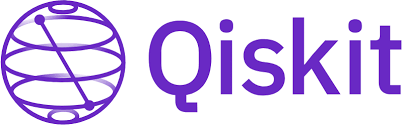

>



# **IBM Q setup**




This tutorial will walk you through the configuration for your IBM Q Experience account so that, in the future, you are able to run your Quantum Programs in both online simulators as well as real Quantum Computers.




In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit-ibmq-provider

In [ ]:
!pip install qiskit-aer

# **Execute on a Real Device (IBM Q Experience)**


You can use Qiskit to run your circuits on real quantum computers using the IBMQ provider.To access IBMQ devices, you'll need an API token. For the public Quantum Experience devices, you can generate an API token here:

https://quantum-computing.ibm.com/

*(create an account if you don't already have one)*

In [ ]:
from qiskit import IBMQ

IBMQ.save_account("4fd8b3617cb6b75504a0f0952fb2223afc228e9b43640b5df8fc4c44127e099d59e8626a1c8cc557975e02b362f395e867877d432ac8581962b9319bfb152611")
IBMQ.load_account() # Load account from disk
IBMQ.providers()

configrc.store_credentials:WARNING:2023-10-22 07:51:10,363: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-10-22 07:51:10,780: Credentials are already in use. The existing account in the session will be replaced.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

# **Loading Qiskit account gives:**

> # RequestsApiError: 401 Client Error



 I successfully installed qiskit,

 yet I am unable to load my account in the Jupyter notebook :(

Each time I load my account in Jupyter/colab notebook here is the response I get:



```
# RequestsApiError: 401 Client Error: Unauthorized for url:

 https://auth.quantum-computing.ibm.com/api/users/loginWithToken.

  LOGIN_FAILED, Error code: LOGIN_FAILED.
```


This is a way to how to fix it :)



```
IBMQ.delete_account()
```

By deleting account, you should not be having any active accounts from IBMQ api. check that by getting active accounts:


```
IBMQ.active_account()
```


After which generate a new token in your IBMQ experience website,

 https://quantum-computing.ibm.com/account


And then copy the new token, save that as a variable (API_KEY), then save account in IBMQ:



```
IBMQ.save_account('API_KEY')
```







# **Which backends are available right now?**


A backend is either an online Quantum simulator or a Quantum Computer.

This is how you can list them by name:

In [ ]:
for backend in provider.backends():
    print(backend)

ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_lagos
ibm_nairobi
ibm_perth
ibm_brisbane


In [ ]:
from qiskit import IBMQ, Aer
provider = IBMQ.load_account()
available_cloud_backends = provider.backends()
print('\n Cloud backends:')
for i in available_cloud_backends:
  print(i)

available_local_backends = Aer.backends()
print('\n Local backends: ')
for i in available_local_backends:
  print(i)

ibmqfactory.load_account:WARNING:2023-10-22 07:51:31,355: Credentials are already in use. The existing account in the session will be replaced.



 Cloud backends:
ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_lagos
ibm_nairobi
ibm_perth
ibm_brisbane

 Local backends: 
aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [ ]:
from qiskit import IBMQ
#provider = IBMQ.load_account() # We load our account
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibm_lagos', 'backend_version': '1.6.2', 'operational': True, 'pending_jobs': 9, 'status_msg': 'active'}
{'backend_name': 'ibm_nairobi', 'backend_version': '1.3.3', 'operational': True, 'pending_jobs': 6, 'status_msg': 'active'}
{'backend_name': 'ibm_perth', 'backend_version': '1.2.8', 'operational': True

In [ ]:
# choose backend efficiently
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
  try:
    qubit_count = len(backend.properties().qubits)
  except:
    qubit_count = "simulated"

  print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 0 queued and simulated qubits
simulator_statevector has 0 queued and simulated qubits
simulator_mps has 0 queued and simulated qubits
simulator_extended_stabilizer has 0 queued and simulated qubits
simulator_stabilizer has 0 queued and simulated qubits
ibm_lagos has 9 queued and 7 qubits
ibm_nairobi has 7 queued and 7 qubits
ibm_perth has 4525 queued and 7 qubits
ibm_brisbane has 5 queued and 127 qubits


# **Defining Quantum Circuits**

Next we have to build our quantum circuits, which actually work together with classical bits.

For example, the following code will build a 2 qubit, 2 classical bit circuit:

In [ ]:
import qiskit as q
%matplotlib inline

# build a 2 qubit, 2 classical circuit
circuit = q.QuantumCircuit(2,2)

# apply a NOT gate to qubit 0, currently 0,0
circuit.x(0)
# now 10

# apply a CNOT gate, which flips 2nd qubit value if first qubit is a 1
circuit.cx(0, 1)
# now 11

# take the measurement
circuit.measure([0, 1], [0, 1])
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

# **Running Circuits on the IBM Quantum Computer**

Let's go with `imb...` since the queue is not that long and has enough qubits for our job.

Now we can choose that backend to run our circuit, and we can specify the number of shots, which is how number of repetitions of each circuit, to make sure we get an adequate representation:

In [ ]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibm_brisbane")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

We can now visualize our result with the following code:

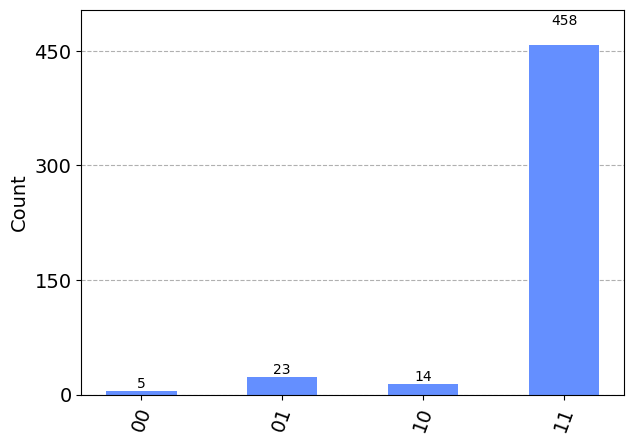

In [ ]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])